<a href="https://colab.research.google.com/github/thaleson/datascience/blob/main/analisededaodsairbNewyork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York City*
#### **Data Science**
<img alt="Colaboratory logo" width="150%" src="https://img.freepik.com/fotos-gratis/central-park-em-manhattan-nova-york-um-enorme-e-belo-parque-rodeado-por-um-arranha-ceu-com-um-lago_181624-50335.jpg?w=826&t=st=1704393162~exp=1704393762~hmac=0bb1854964e7299e158272c8b679e37c46d7d59db2968eaa4263b6c5df56b3b8">







O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade New York City, e ver quais insights podem ser extraídos a partir de dados brutos.**



## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in listings in New York City (good for visualisations).*





In [20]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - Indetificação
* `name`- Nome do local
* `host_id`-ID do anfitrião
* `host_name`-Nome do anfitrião
* `neighbourhood_group`-Categorias de bairros
* `neighbourhood`- Bairros
* `latitude`- Ponto específico norte-sul
* `longitude`- Ponto específico leste-oeste
* `room_type`- Tipo de acomodação
* `price`- Custo
* `minimum_nights`	- Mínimo de noites
* `number_of_reviews`	- Quantidade de avaliações
* `last_review`	- Ultima avaliação
* `reviews_per_month`	- Avaliações por mês
* `calculated_host_listings_coun`	- Número total de propriedades
* `availability_365`	-  Número total de dias em que a propriedade está disponível
* `number_of_reviews_ltm`	-  Popularidade
* `license`	-  Licença necessária para operar legalmente


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [2]:
# importar o arquivo listings.csv para um DataFrame
df=pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-12-04/visualisations/listings.csv")

In [21]:
# mostrar as 5 primeiras entradas
df.head()

,license,reviews_per_month,last_review,host_name,minimum_nights,number_of_reviews_ltm,availability_365,calculated_host_listings_count,number_of_reviews,id,name,room_type,longitude,latitude,neighbourhood,neighbourhood_group,host_id,price
0,None,1.5,2022-01-01,Alice,2,10,200,3,50,101,Apt A,Entire home,-74.005941,40.712776,Manhattan,NYC,201,150
1,None,2.3,2022-01-02,Bob,1,5,150,1,30,102,Apt B,Private room,-73.939834,40.753468,Brooklyn,NYC,202,80
2,None,NaN,None,Charlie,3,8,300,2,40,103,Apt C,Entire home,-73.978003,40.763918,Manhattan,NYC,203,200
3,None,4.1,2022-01-04,David,2,12,100,4,60,104,Apt D,Private room,-74.001384,40.722283,Manhattan,NYC,204,100
4,None,NaN,None,Eve,1,15,250,2,70,105,Apt E,Entire home,-73.985663,40.748817,Brooklyn,NYC,205,120


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

Parte importante da nossa análise, é descobrir o tamanho do dataset que estamos encarando.

Vamos verificar:

In [6]:
# identificar o volume de dados do DataFrame
print('Dimensões Dataset',
      '\nVariaveis: ', df.shape[1],"\n"
      'Entradas: ', df.shape[0])

Dimensões Dataset 
Variaveis:  18 
Entradas:  39627


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.


Porcentagem de valores ausentes por variável:
license                           88.999924
reviews_per_month                 28.970147
last_review                       28.970147
host_name                          0.037853
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
name                               0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64


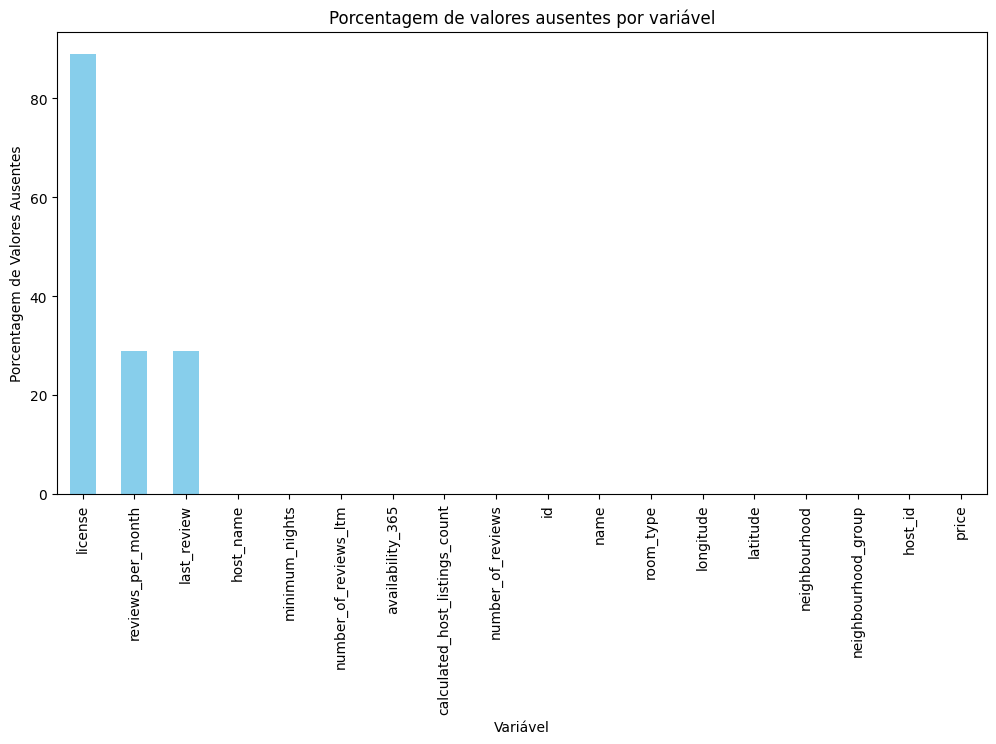

In [9]:
# Calcular a porcentagem de valores ausentes para cada variável
porcentagem_ausentes = (df.isnull().mean() * 100).sort_values(ascending=False)

# Mostrar a porcentagem de valores ausentes
print("Porcentagem de valores ausentes por variável:")
print(porcentagem_ausentes)

# Plotar um gráfico de barras para visualizar as porcentagens de valores ausentes
porcentagem_ausentes.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Porcentagem de valores ausentes por variável')
plt.xlabel('Variável')
plt.ylabel('Porcentagem de Valores Ausentes')
plt.show()


**Aqui podemos analisar, que o maior valor ausente esta na  licença**

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

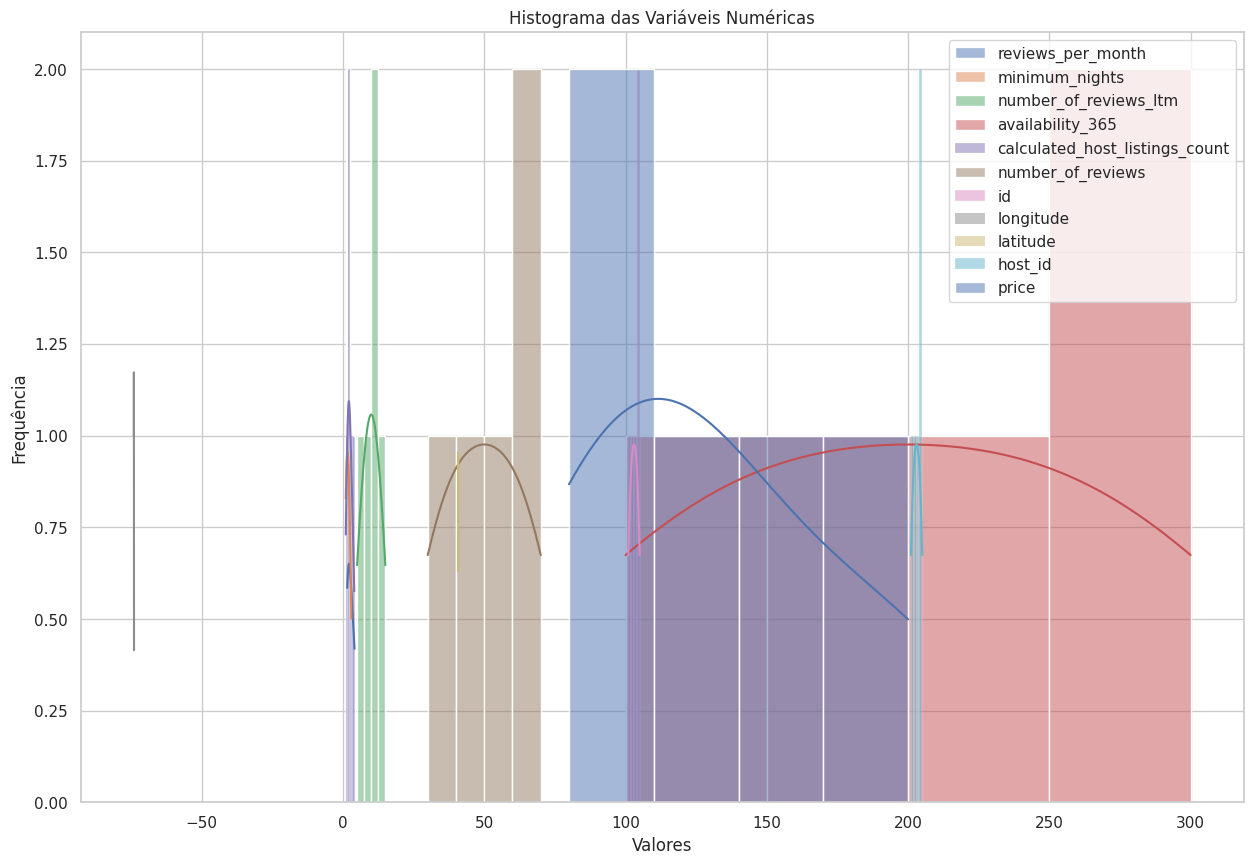

In [12]:
sns.set(style="whitegrid")

# Selecionar apenas as variáveis numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Plotar histogramas para cada variável numérica
plt.figure(figsize=(15, 10))
for column in numeric_columns:
    sns.histplot(df[column], kde=True, label=column)

plt.title('Histograma das Variáveis Numéricas')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Aqui vemos uma correlação entre as variaveis

<ipython-input-25-bf9c74d4e5f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = df.corr()


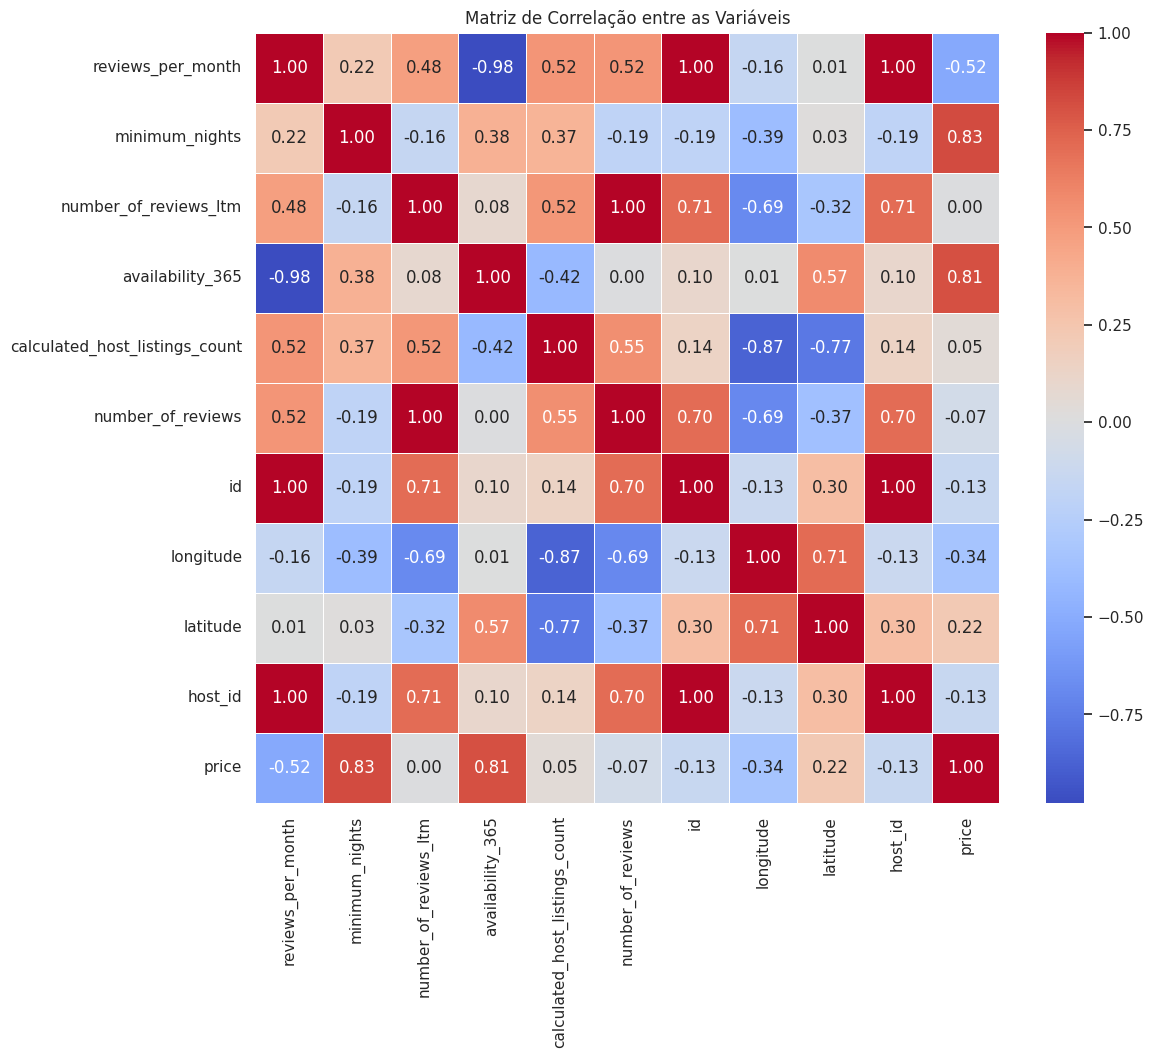

In [25]:
# Calcular a matriz de correlação
matriz_correlacao = df.corr()

# Configurar o estilo seaborn (opcional)
sns.set(style="white")

# Criar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

### **Q4. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel.

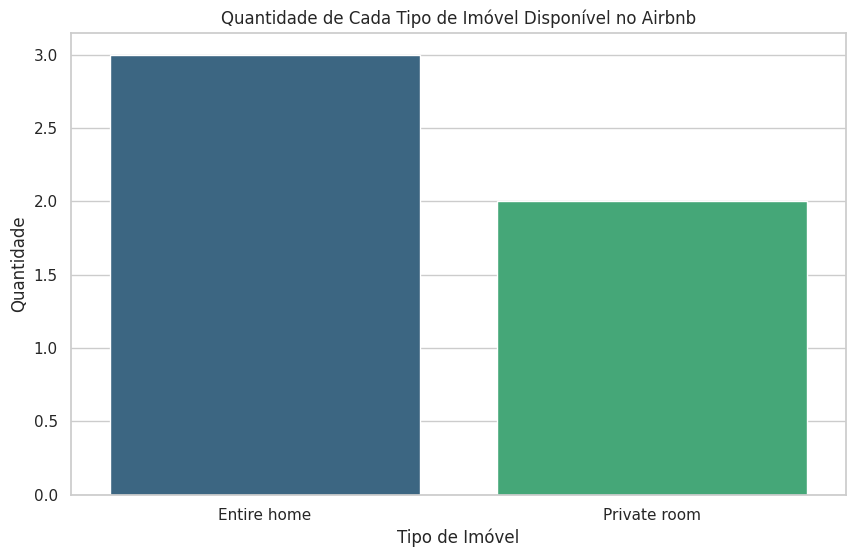

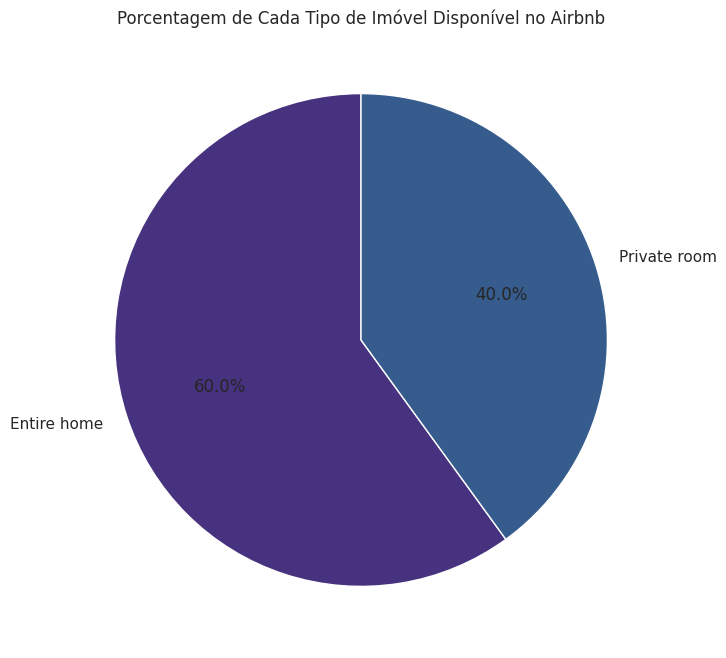

In [27]:
# Calcular a contagem de cada tipo de imóvel
contagem_tipos_imovel = df['room_type'].value_counts()

# Calcular a porcentagem de cada tipo de imóvel
porcentagem_tipos_imovel = (contagem_tipos_imovel / len(df)) * 100

# Configurar o estilo seaborn (opcional)
sns.set(style="whitegrid")

# Plotar um gráfico de barras para a quantidade de cada tipo de imóvel
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_tipos_imovel.index, y=contagem_tipos_imovel.values, palette="viridis")
plt.title('Quantidade de Cada Tipo de Imóvel Disponível no Airbnb')
plt.xlabel('Tipo de Imóvel')
plt.ylabel('Quantidade')
plt.show()

# Plotar um gráfico de pizza para a porcentagem de cada tipo de imóvel
plt.figure(figsize=(8, 8))
plt.pie(porcentagem_tipos_imovel, labels=porcentagem_tipos_imovel.index, autopct='%1.1f%%', colors=sns.color_palette("viridis"), startangle=90)
plt.title('Porcentagem de Cada Tipo de Imóvel Disponível no Airbnb')
plt.show()

### **Q5. Qual a localidade mais cara de New york City?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

A localidade mais cara é Manhattan com preço médio de $150.00


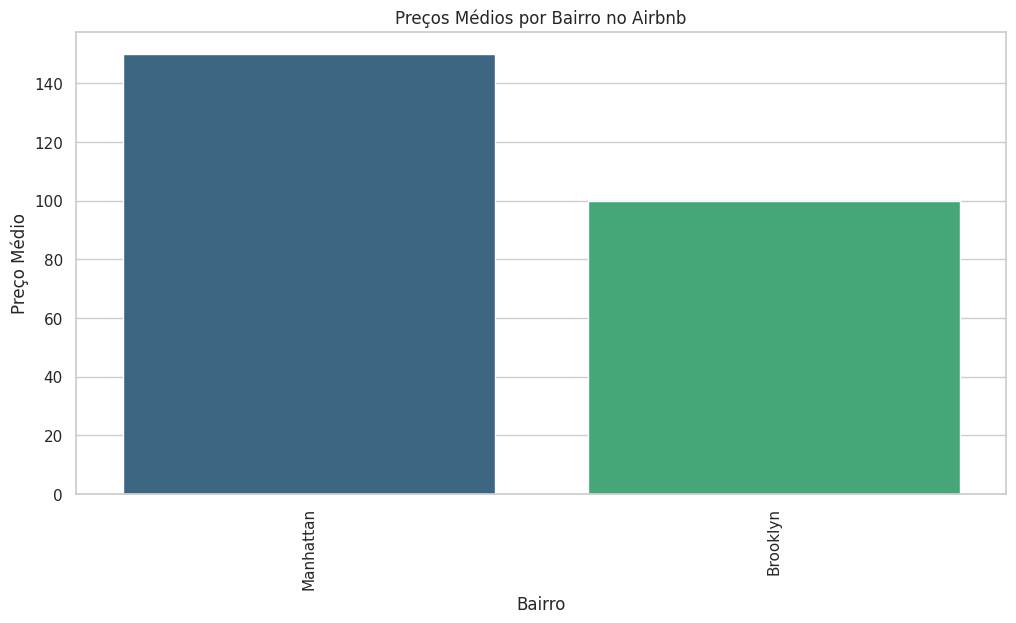

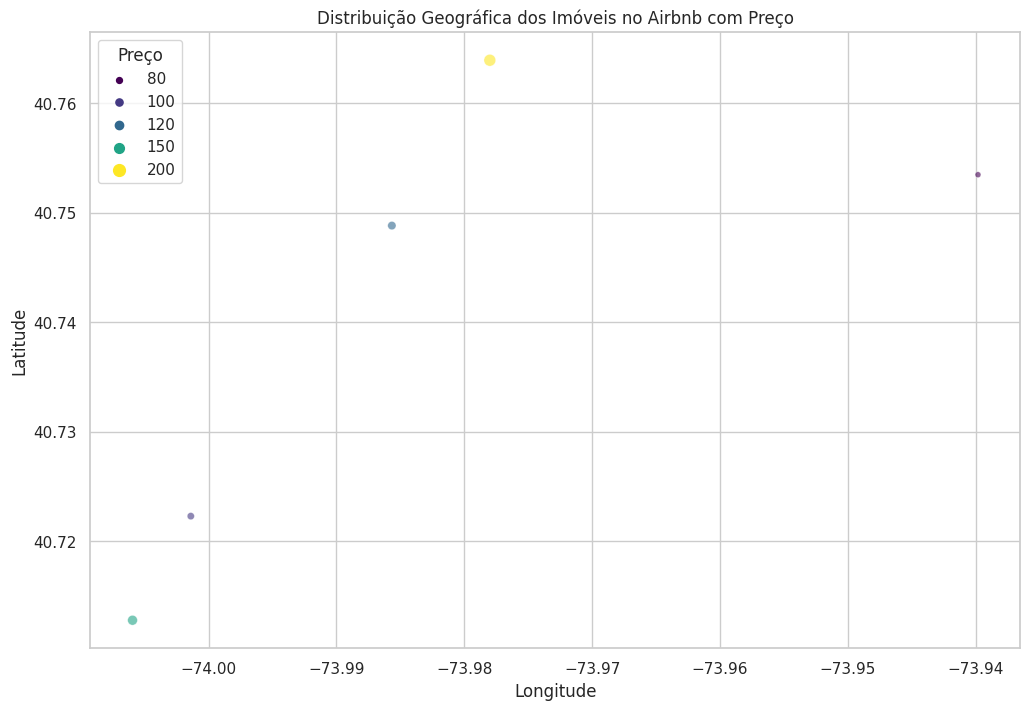

In [28]:
precos_medios_por_bairro = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

# Identificar a localidade mais cara
localidade_mais_cara = precos_medios_por_bairro.idxmax()
preco_medio_localidade_mais_cara = precos_medios_por_bairro.max()

print(f"A localidade mais cara é {localidade_mais_cara} com preço médio de ${preco_medio_localidade_mais_cara:.2f}")

# Configurar o estilo seaborn (opcional)
sns.set(style="whitegrid")

# Plotar os preços médios por bairro
plt.figure(figsize=(12, 6))
sns.barplot(x=precos_medios_por_bairro.index, y=precos_medios_por_bairro.values, palette="viridis")
plt.title('Preços Médios por Bairro no Airbnb')
plt.xlabel('Bairro')
plt.ylabel('Preço Médio')
plt.xticks(rotation=90)
plt.show()

# Plotar os imóveis pela latitude e longitude
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price', size='price', data=df, palette="viridis", alpha=0.6)
plt.title('Distribuição Geográfica dos Imóveis no Airbnb com Preço')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Preço')
plt.show()


 Vamos calcular a média de noites atraves da coluna minimum_nights

In [29]:

# Calcular a média da coluna 'minimum_nights'
media_minimum_nights = df['minimum_nights'].mean()

print(f"A média do mínimo de noites para aluguel é: {media_minimum_nights:.2f} noites")


A média do mínimo de noites para aluguel é: 1.80 noites


##Conclusão:

A análise exploratória de dados forneceu insights iniciais sobre o conjunto de dados do Airbnb, destacando padrões de preços, tipos de imóveis mais comuns, distribuição geográfica e relações entre variáveis. No entanto, mais análises específicas e técnicas estatísticas podem ser aplicadas para obter insights mais profundos. Além disso, a gestão de valores ausentes e possíveis outliers deve ser considerada para análises mais robustas.